# **Exploring Iris Dataset Classifiers with Python Scikit-learn**
In this jupyter notebook, we will explore the Iris dataset from the UCI Machine Learning Repository. Excerpted from the [UCI website](https://archive.ics.uci.edu/ml/datasets/iris), it is said to be *“perhaps the best known database to be found in the pattern recognition literature”*. Jason Brownlee who started the [Community of Machine Learning Mastery](https://machinelearningmastery.com/machine-learning-in-python-step-by-step/) called it the *“Hello World”* of machine learning.

For a moment, imagine that you are not a flower expert. Can you then distinguish between three different species of iris — setosa, versicolor, and virginica? You can't?  

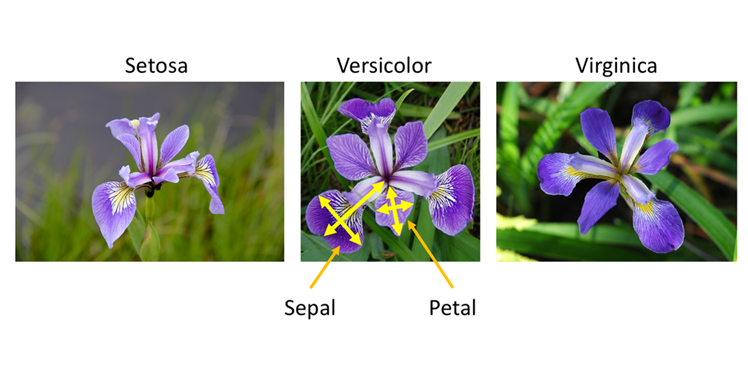



But what if we have a dataset that contains instances of these species, with measurements of their sepals and petals?
In other words, can we learn anything from this dataset that would help us distinguish between the three species?

- 150 samples, with 4 attributes (same units, all numeric)
- Balanced class distribution (50 samples for each class)
- No missing data

I would recommend this dataset to anyone who is a beginner in data science and is eager to build their first machine learning (ML) model. See below for some of nice characteristics of this dataset:

### Useful resources:
* [Dehao Zhang](https://towardsdatascience.com/exploring-classifiers-with-python-scikit-learn-iris-dataset-2bcb490d2e1b) A Step-by-step guide on how you can build your first classifier in Python 
* [Fisher,R.A.](https://hekyll.services.adelaide.edu.au/dspace/bitstream/2440/15227/1/138.pdf) The use of multiple measurements in taxonomic problems; Annual Eugenics, 7 (II), 179-188 (1936)

---
Author: 
*   dr.daniel benninger  [> linkedin](https://www.linkedin.com/in/danielbenninger/)

History: 
*  v1, June    2021, dbe --- initial version for BINA FS21
*  v2, January 2022, dbe --- minor corrections for CAS BIA12
*  v3, May     2022, dbe --- minor adaption for BINA FS22

## A) Setup Environment  - Load necessary Libraries and Functions

First, we need to import some libraries:  **pandas** (loading dataset), **numpy** (matrix manipulation), **matplotlib** and **seaborn** (visualization), and **sklearn** (building classifiers).  

Make sure they are installed already before importing them

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from pandas.plotting import parallel_coordinates

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

## B) Load and Analyze Data   
**Note:** load the IRIS dataset through url from the *UCI Machine Learning* website

In [ ]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
attributes = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]
dataset = pd.read_csv(url, names = attributes)
dataset.columns = attributes

In [ ]:
dataset

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
# or load through the IRIS dataset via local csv file
data = pd.read_csv('/content/sample_data/SampleData_Iris-v2.csv')

In [ ]:
data.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
# show data types for the columns
data.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

## C) First, let’s look at a **numerical summary** of each attribute through *describe*

In [ ]:
# First, let’s look at a numerical summary of each attribute through *describe*
# note: only applies to numerical columns
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
# count the Number of Instances in each class of spcies (total: 150 entries)
data.groupby('species').size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

---  
## [Part 1] Start the Machine Learning Process with the **Train-Test-Split** and a **Data Exploration**  
---  
**Classification** is a type of **supervised machine learning problem** where the target (response) variable is categorical.  

Given the training data, which contains the known label, the classifier approximates a mapping function (f) from the input variables (X) to output variables (Y).

Thus, first split the dataset into **Train** and **Test** data and analyze the resulting train dataset through **Descriptive Analytic Methods** 

### Generate a **Train-Test dataset** split

In [ ]:
# Note: The general rule of thumb is have 20–30% of dataset as the test set. 
# Due to the small size of this dataset, we chose 40% to ensure there are enough data points to test the model performance.

train, test = train_test_split(data, test_size = 0.4, stratify = data['species'], random_state = 42)

In [ ]:
# number of instances in each class in training data
train.groupby('species').size()

species
setosa        40
versicolor    40
virginica     40
dtype: int64

### Do some **Exploratory Data Analysis** (*descriptive analytics*) to get a better understanding of the Train Dataset

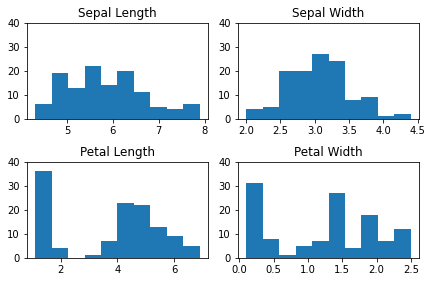

In [ ]:
# Draw Histogram plots (param = no of bins (n_bins)) using matplotlib.pyplot function (plt)
n_bins = 10
fig, axs = plt.subplots(2, 2)

axs[0,0].hist(train['sepal_length'], bins = n_bins);
axs[0,0].set_title('Sepal Length');
axs[0,0].set_ylim(ymin=0,ymax=40);

axs[0,1].hist(train['sepal_width'], bins = n_bins);
axs[0,1].set_title('Sepal Width');
axs[0,1].set_ylim(ymin=0,ymax=40);

axs[1,0].hist(train['petal_length'], bins = n_bins);
axs[1,0].set_title('Petal Length');
axs[1,0].set_ylim(ymin=0,ymax=40);

axs[1,1].hist(train['petal_width'], bins = n_bins);
axs[1,1].set_title('Petal Width');
axs[1,1].set_ylim(ymin=0,ymax=40);

# add some spacing between subplots
fig.tight_layout(pad=1.0);

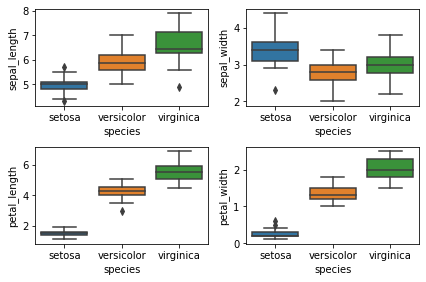

In [ ]:
# Draw Boxplots using seaborn (sns) functions
fig, axs = plt.subplots(2, 2)

fn = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
cn = ['setosa', 'versicolor', 'virginica']

sns.boxplot(x = 'species', y = 'sepal_length', data = train, order = cn, ax = axs[0,0]);
sns.boxplot(x = 'species', y = 'sepal_width', data = train, order = cn, ax = axs[0,1]);
sns.boxplot(x = 'species', y = 'petal_length', data = train, order = cn, ax = axs[1,0]);
sns.boxplot(x = 'species', y = 'petal_width', data = train,  order = cn, ax = axs[1,1]);

# add some spacing between subplots
fig.tight_layout(pad=1.0);

The two plots at the bottom suggest that that group of data points we saw earlier are setosas. Their petal measurements are smaller and less spread-out than those of the other two species as well. Comparing the other two species, versicolor has lower values than virginica on average.  

And immediately, we see that petal length/width can separate setosa specie from the others.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

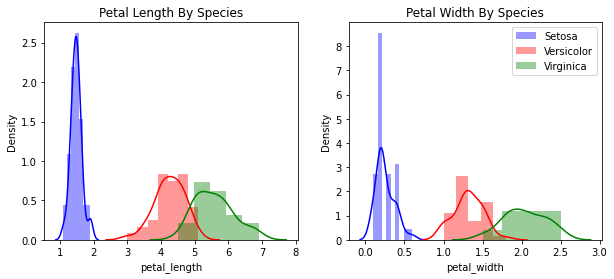

In [ ]:
# Draw Histogram (density) plot by Species using the seaborn function 

# Length attributes
setosa_pl = train.loc[train.species=='setosa', 'petal_length']
versicolor_pl = train.loc[train.species=='versicolor', 'petal_length']
virginica_pl = train.loc[train.species=='virginica', 'petal_length']

# Width attributes
setosa_pw = train.loc[train.species=='setosa', 'petal_width']
versicolor_pw = train.loc[train.species=='versicolor', 'petal_width']
virginica_pw = train.loc[train.species=='virginica', 'petal_width']

# # Draw Histogram plots  using matplotlib.pyplot function (plt)
fig, axs = plt.subplots(1, 2)

# set figure size
fig.set_size_inches(10,4)

ax1 = sns.distplot(setosa_pl, color="blue", label="Setosa", ax = axs[0]);
ax1 = sns.distplot(versicolor_pl, color="red", label="Versicolor", ax = axs[0]);
ax1 = sns.distplot(virginica_pl, color="green", label="Virginica", ax = axs[0]);
ax1.set_title('Petal Length By Species')

ax2 = sns.distplot(setosa_pw, color="blue", label="Setosa", ax = axs[1]);
ax2 = sns.distplot(versicolor_pw, color="red", label="Versicolor", ax = axs[1]);
ax2 = sns.distplot(virginica_pw, color="green", label="Virginica", ax = axs[1]);
ax2.set_title('Petal Width By Species')

# plot a legend
plt.legend();

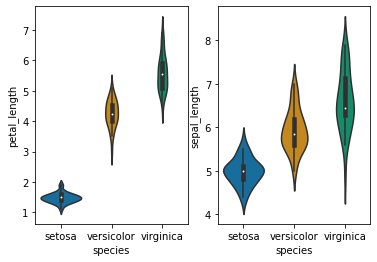

In [ ]:
# Draw Histogram (violin) plot by Species, using the seaborn function
# Note: Violin plot is another type of visualization, which combines the benefit of both histogram and box plot

fig, axs = plt.subplots(1, 2)

ax1= sns.violinplot(x="species", y="petal_length", data=train, size=5, order = cn, palette = 'colorblind',ax = axs[0]);
ax2= sns.violinplot(x="species", y="sepal_length", data=train, size=5, order = cn, palette = 'colorblind',ax = axs[1]);


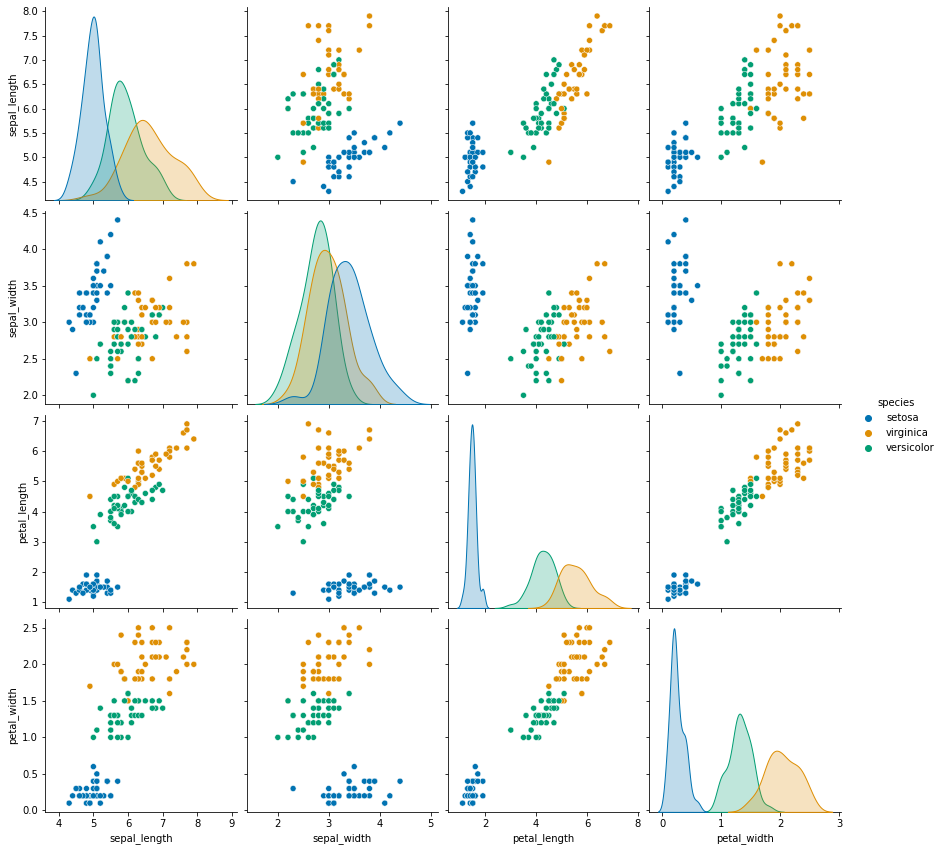

In [ ]:
# Analyze bivariate relationship using Scatterplots

sns.pairplot(train, hue="species", height = 3, palette = 'colorblind');

Note that some variables seem to be highly correlated, e.g., petal_length and petal_width. In addition, the petal measurements separate the different species better than the sepal ones.

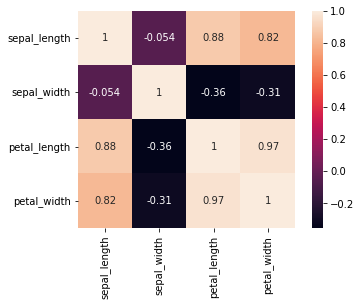

In [ ]:
# and finally calculating bivariate relationship measures by the  Correlation Matrix/Heatmap

corrmat = train.corr()

sns.heatmap(corrmat, annot = True, square = True);

The main takeaway is that the petal measurements have highly positive correlation, while the sepal one are uncorrelated. Note that the petal features also have relatively high correlation with sepal_length, but not with sepal_width.

---  
## [Part 2] Machine Learning - **Develop a Model**  
---  
**Develop a Model** using the Train dataset and appropriate Supervised  (**Classification**) Machine Learning Algorithms

In [ ]:
# Model development, to make our lives easier, let’s separate out the class label and features first:

X_train = train[['sepal_length','sepal_width','petal_length','petal_width']]
y_train = train.species

X_test = test[['sepal_length','sepal_width','petal_length','petal_width']]
y_test = test.species

### [Algorithm] **Decision Tree** Classifier

The first classifier that comes up to our mind is a discriminative classification model called **classification trees** (*decision trees*). The reason is that we get to see the *classification rules* and it is *easy to interpret*.  

Let’s build one using **sklearn**, with a *maximum depth of 3* and then check its accuracy on the test dataset

In [ ]:
# First try Decision Tree
mod_dt = DecisionTreeClassifier(max_depth = 3, random_state = 1)
mod_dt.fit(X_train,y_train)

prediction=mod_dt.predict(X_test)
print('The accuracy of the Decision Tree is',"{:.3f}".format(metrics.accuracy_score(prediction,y_test)))

The accuracy of the Decision Tree is 0.967


This decision tree predicts *98.3% of the test data correctly*.  

One nice thing about this model is that you can see the importance of each predictor through its *feature_importances_attribute*:

In [ ]:
mod_dt.feature_importances_

array([0.        , 0.        , 0.06071875, 0.93928125])

From the output and based on the indices of the four *features*, we know that the first two features (sepal measurements) are of no importance, and **only the petal ones are used** to build this tree.  


Another nice thing about the decision tree is that we can **visualize the classification rules** through *plot_tree*

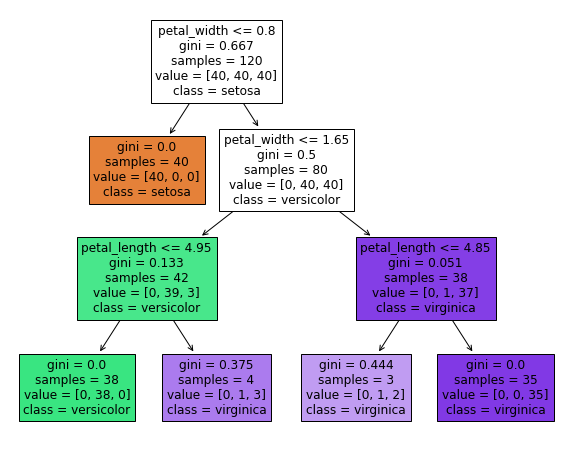

In [ ]:
# Visualize the Decision Tree
# Treeplot
plt.figure(figsize = (10,8))
plot_tree(mod_dt, feature_names = fn, class_names = cn, filled = True);

Apart from each rule (e.g. the first criterion is petal_width ≤ 0.8), we can also see the **Gini Index** (*impurity measure*) at each split, assigned class, etc. 

Note that all terminal nodes are pure besides the two *light purple* boxes at the bottom. We can less confident regarding instances in those two categories.

To demonstrate how easy it is **to classify new data points**, say a new instance has a petal length of 4.5 cm and a petal width of 1.5 cm, then we can predict it to be versicolor following the rules.

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


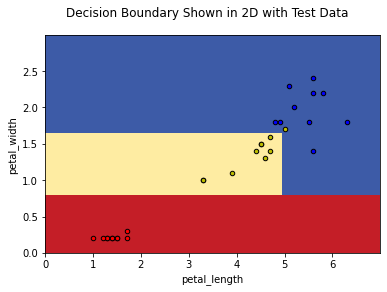

In [ ]:
# Visualize the Decision Tree
# Plot Decision Boundary for pedal width vs pedal length
plot_step = 0.01
plot_colors = "ryb"
xx, yy = np.meshgrid(np.arange(0, 7, plot_step), np.arange(0, 3, plot_step))
plt.tight_layout(h_pad=1, w_pad=1, pad=2.5)

selected_predictors = ["petal_length", "petal_width"]
mod_dt_1 = DecisionTreeClassifier(max_depth = 3, random_state = 1)
y_train_en = y_train.replace({'setosa':0,'versicolor':1,'virginica':2}).copy()
mod_dt_1.fit(X_train[selected_predictors],y_train_en)

pred_all = mod_dt_1.predict(np.c_[xx.ravel(), yy.ravel()])
pred_all = pred_all.reshape(xx.shape)

graph = plt.contourf(xx, yy, pred_all, cmap=plt.cm.RdYlBu)

plt.xlabel(selected_predictors[0])
plt.ylabel(selected_predictors[1])

# plot test data points
n_class = 3
for i, color in zip(cn, plot_colors):
    temp = np.where(y_test == i)
    idx = [elem for elems in temp for elem in elems]
    plt.scatter(X_test.iloc[idx, 2], X_test.iloc[idx, 3], c=color, 
                label=y_test, cmap=plt.cm.RdYlBu, edgecolor='black', s=20)

plt.suptitle("Decision Boundary Shown in 2D with Test Data")
plt.axis("tight");

---  
## [Part 3] Machine Learning - **Evaluate the Model** 
---
**Evaluate a Model** using the Test dataset and calculating the **confusion matrix** and classification metrics

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


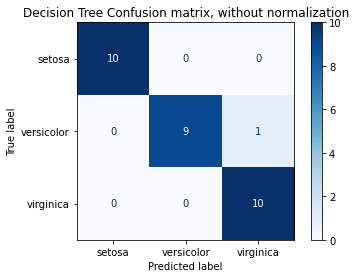

In [ ]:
# Evaluate the Decision Tree using the Test dataset
# calculate the Confusion Matrix

disp = metrics.plot_confusion_matrix(mod_dt, X_test, y_test,
                                 display_labels=cn,
                                 cmap=plt.cm.Blues,
                                 normalize=None)
disp.ax_.set_title('Decision Tree Confusion matrix, without normalization');
# one versicolor misclassified !

Out of the 30 data points, 29 are correctly classified.  
Through this matrix, we see that there is one versicolor which we predict to be virginica.  

One downside is building a single tree is its **instability**, which can be improved through **Ensemble Techniques** such as *random forests*, *boosting*, etc.

---  
# [ADDON] Other Classification Algorithms
---  
* Naive Bayes (NB)
* Linear-Discriminant-Analysis (LDA)
* k-Nearest-Neighbours (kNN)

---  
### [Algorithm] **Naive Bayes** Classifier  

One of the most popular classification models is **Naive Bayes**. It contains the word “Naive” because it has a key assumption of *class-conditional independence*, which means that given the class, each feature’s value is assumed to be independent of that of any other feature.

We know that it is clearly not the case here, evidenced by the high correlation between the petal features. 

> *See the Scikit-Learn documentation on [Naive Bayes classifier](https://scikit-learn.org/stable/modules/naive_bayes.html)*

In [ ]:
# Guassian Naive Bayes Classifier
mod_gnb_all = GaussianNB()
y_pred = mod_gnb_all.fit(X_train, y_train).predict(X_test)

print('The accuracy of the Guassian Naive Bayes Classifier on test data is',"{:.3f}".format(metrics.accuracy_score(y_pred,y_test)))

The accuracy of the Guassian Naive Bayes Classifier on test data is 0.933


In [ ]:
# Guassian Naive Bayes Classifier with two predictors
mod_gnb = GaussianNB()
y_pred = mod_gnb.fit(X_train[selected_predictors], y_train).predict(X_test[selected_predictors])

print('The accuracy of the Guassian Naive Bayes Classifier with 2 predictors on test data is',"{:.3f}".format(metrics.accuracy_score(y_pred,y_test)))

The accuracy of the Guassian Naive Bayes Classifier with 2 predictors on test data is 0.950


Interestingly, using only two features results in more correctly classified points, suggesting possibility of over-fitting when using all features. Seems that our Naive Bayes classifier did a decent job.

---  
### [Algorithm] **Linear-Discriminant-Analysis (LDA)** Classifier  

If we use multivariate Gaussian distribution to calculate the class conditional density instead of taking a product of univariate Gaussian distribution (used in Naive Bayes), we would then get a **linear-discriminant analysis** (LDA) model.  

The key assumption of LDA is that the *covariances are equal among classes*.

> *See the Scikit-Learn documentation on [LDA classifier](https://scikit-learn.org/stable/modules/lda_qda.html#lda-qda)*

In [ ]:
# LDA Classifier
mod_lda_all = LinearDiscriminantAnalysis()
y_pred = mod_lda_all.fit(X_train, y_train).predict(X_test)

print('The accuracy of the LDA Classifier on test data is',"{:.3f}".format(metrics.accuracy_score(y_pred,y_test)))

The accuracy of the LDA Classifier on test data is 0.983


In [ ]:
# LDA Classifier with two predictors
mod_lda = LinearDiscriminantAnalysis()
y_pred = mod_lda.fit(X_train[selected_predictors], y_train).predict(X_test[selected_predictors])

print('The accuracy of the LDA Classifier with two predictors on test data is',"{:.3f}".format(metrics.accuracy_score(y_pred,y_test)))

The accuracy of the LDA Classifier with two predictors on test data is 0.933


---  
### [Algorithm] **k-Nearest-Neighbour (KNN)** Classifier  

Now, let’s take a look at a *non-parametric generative model* called **k-Nearest-Neighbour** (KNN). It is a popular model since it is relatively simple and easy to implement. 

However, we need to be aware of the *curse of dimensionality* when number of features gets large.  

> *See the Scikit-Learn documentation on [KNN classifier](https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors-classification)*

In [ ]:
# k-Nearest Neighbour Classifier
# first try with param k=5
mod_5nn=KNeighborsClassifier(n_neighbors=5) 
mod_5nn.fit(X_train,y_train)

prediction=mod_5nn.predict(X_test)
print('The accuracy of the 5NN Classifier is',"{:.3f}".format(metrics.accuracy_score(prediction,y_test)))

The accuracy of the 5NN Classifier is 1.000


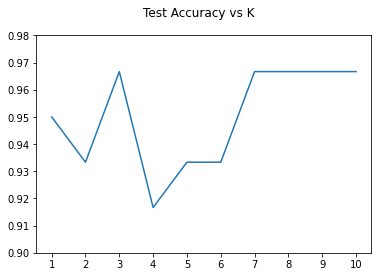

In [ ]:
# try with different param k (1..11)
acc_s = pd.Series(dtype = 'float')

for i in list(range(1,11)):
    mod_knn=KNeighborsClassifier(n_neighbors=i) 
    mod_knn.fit(X_train,y_train)
    prediction=mod_knn.predict(X_test)
    acc_s = acc_s.append(pd.Series(metrics.accuracy_score(prediction,y_test)))

# plot test accuracy with different param k )
plt.plot(list(range(1,11)), acc_s)

plt.suptitle("Test Accuracy vs K")
plt.xticks(list(range(1,11)))
plt.ylim(0.9,0.98);

We can see that the accuracy is highest (about 0.965) when K is 3, or between 7 and 10.  

Compare to the previous models, it is *less straightforward to classify new data points* since we would need to look at its K closest neighbors in four-dimensional space.